# 範例

透過 SIFT 特徵實作 Brute-Force Matching

In [1]:
# ! pip install --user opencv-contrib-python==3.4.2.16

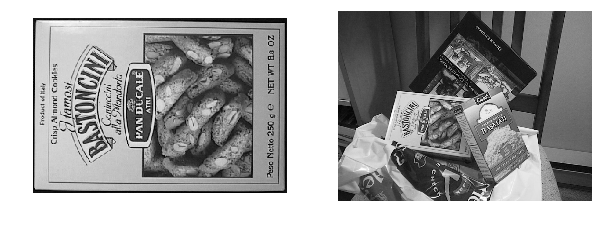

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 以灰階方式讀入圖片
img_query = cv2.imread('../data/box.png', 0)
img_train = cv2.imread('../data/box_in_scene.png', 0)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img_query, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img_train, cmap='gray')

In [3]:
# 建立 SIFT 物件
sift = cv2.xfeatures2d_SIFT.create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

Text(0.5,1,'SIFT Matches')

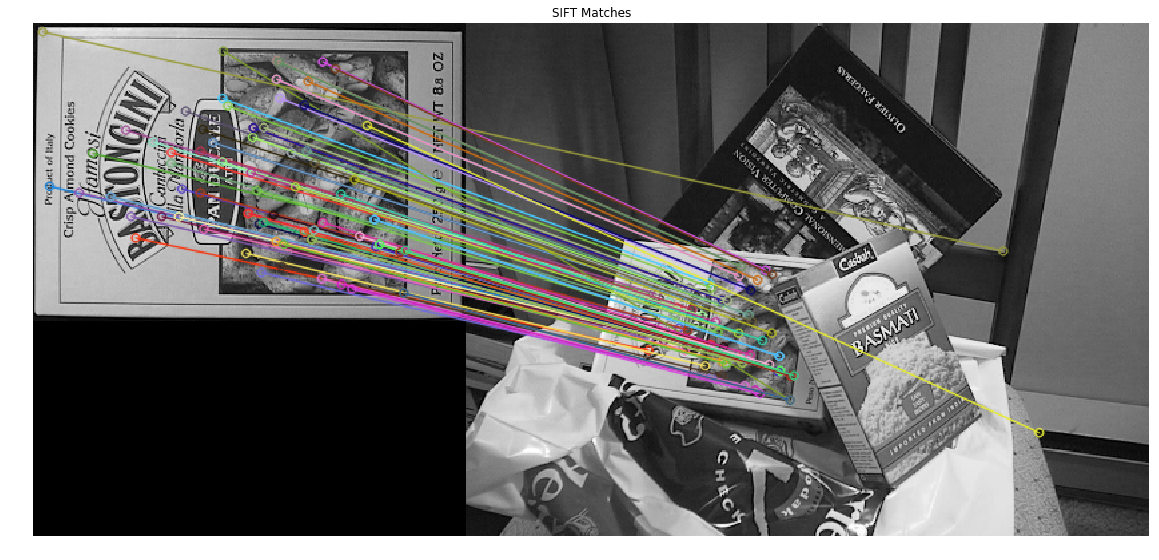

In [7]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, 
                              kp_query, 
                              img_train, 
                              kp_train, 
                              candidate, 
                              None, 
                              flags=2) # None一定要給, flags=2表示沒配對到不顯示

# 顯示圖片
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(img_show)
plt.title('SIFT Matches')
# while True:
#     cv2.imshow('matches', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break